# Исследование рынка заведений общественного питания Москвы 

**Содержание**

<a id=0> </a>
[Введение](#1)  
[Предобработка данных](#2)  
[Анализ даннах](#3)  
[Вывод](#4)


<a id=1></a> 
## Введение 

Мы с партнерами хотели бы открыть заведение общественного питания в Москве оригинального формата: гостей должны обслуживать роботы. Для того, чтобы найти инвестиции, нам необходимо проанализировать рынок общепита Москвы. Анализ будем делать на открытых данных.  
Посмотрим, в каких районах москвы больше всего заведений, где выгоднее открыть кафе, сколько столиков там должно быть и лучше ли быть сетевым заведением или нет.

In [1]:
# импортируем библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np    

In [2]:
# загрузим датасет
try: 
    rest_data = pd.read_csv('/Users/09e6y/Desktop/Катькис/Практикум/Проект 8 moscow rest/rest_data.csv')
except FileNotFoundError:
    rest_data = pd.read_csv('/datasets/rest_data.csv')

In [3]:
rest_data.head()


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


В нашем распоряжении база данных заведений общественного питания Москвы, собранная из открытых источников. В ней названия заведений, их тип, адрес и количество столиков. Скорее всего, это не вся информация, что нам пригодится.

## Предобработка данных
<a id=2> </a>

Проверим наши данные на предмет ошибок и дубликатов.

Приведем названия заведений к нижнему регистру.

In [4]:
rest_data['object_name'] = rest_data['object_name'].str.lower()
rest_data['object_name'].unique()


array(['сметана', 'родник', 'кафе «академия»', ..., 'бар мята lounge',
       'мята lounge октябрьская', 'кальянная «мята lounge»'], dtype=object)

In [5]:
rest_data['object_name'] = rest_data['object_name'].str.lower()
rest_data['object_name'].unique()

rest_data.groupby('object_name')['object_name'].count().sort_values(ascending=False)


object_name
столовая                      321
кафе                          278
шаурма                        250
шоколадница                   158
kfc                           155
                             ... 
кафе «abc coffee roasters»      1
кафе «agadir»                   1
кафе «americano»                1
кафе «anadolu»                  1
кофе поинт                      1
Name: object_name, Length: 9924, dtype: int64

In [6]:
pd.set_option('display.max_rows', 10) # вернем стандартное отображение



Избивимся от неявных дубликатов названий. У нас есть список наиболее часто используемых, пока поправим вручную, что возможно.

In [7]:
rest_data['object_name'] = rest_data['object_name'].replace(['старбакс', 'кафе «старбакс»'], 'starbucks')
rest_data['object_name'] = rest_data['object_name'].replace(['ресторан «макдоналдс»', 'предприятие быстрого обслуживания «макдоналдс»', 'кафе «макдоналдс»'], 'макдоналдс')
rest_data['object_name'] = rest_data['object_name'].replace('братья караваевы', 'кулинарная лавка братьев караваевых')
rest_data['object_name'] = rest_data['object_name'].replace(['бургер кинг burger king', 'ресторан «бургер кинг»', 'кафе «бургер кинг»'], 'бургер кинг')
                                                       

In [8]:
rest_data[rest_data['object_name'] == 'mcdonalds']


,id,object_name,chain,object_type,address,number
14147,210128,mcdonalds,нет,предприятие быстрого обслуживания,"город Москва, Шереметьевская улица, дом 20",1


In [9]:
rest_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


В колонке `chain` должны быть булевы значения, следует поменять формат.

In [10]:
rest_data['chain'] = rest_data['chain'] == 'да'
rest_data['chain']


0        False
1        False
2        False
3         True
4        False
         ...  
15361     True
15362     True
15363     True
15364     True
15365     True
Name: chain, Length: 15366, dtype: bool

In [11]:
rest_data.duplicated(subset=rest_data.columns.difference(['id'])).sum() # посчитаем количество дубликатов


85

Дубликатов не так много - можно просто их удалить.

In [12]:
# удалим дубликаты, сделаем перезагрузку индексов
rest_data = rest_data.drop_duplicates(subset=rest_data.columns.difference(['id'])).reset_index(drop=True)
rest_data.duplicated(subset=rest_data.columns.difference(['id'])).sum()

0

In [13]:
rest_data.isna().sum() # посчитаем количество пропусков


id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

Все данные правильного формата, пропусков и дубликатов не обнаружено. Можно приступать а анализу.

[Содержание](#0)

## Анализ данных
<a id=3> </a>

Посмотрим, какие типы заведений в Москве популярнее всего.

,object_type,id
3,кафе,6071
8,столовая,2584
7,ресторан,2282
6,предприятие быстрого обслуживания,1897
0,бар,855
1,буфет,576
4,кафетерий,395
2,закусочная,348
5,магазин (отдел кулинарии),273


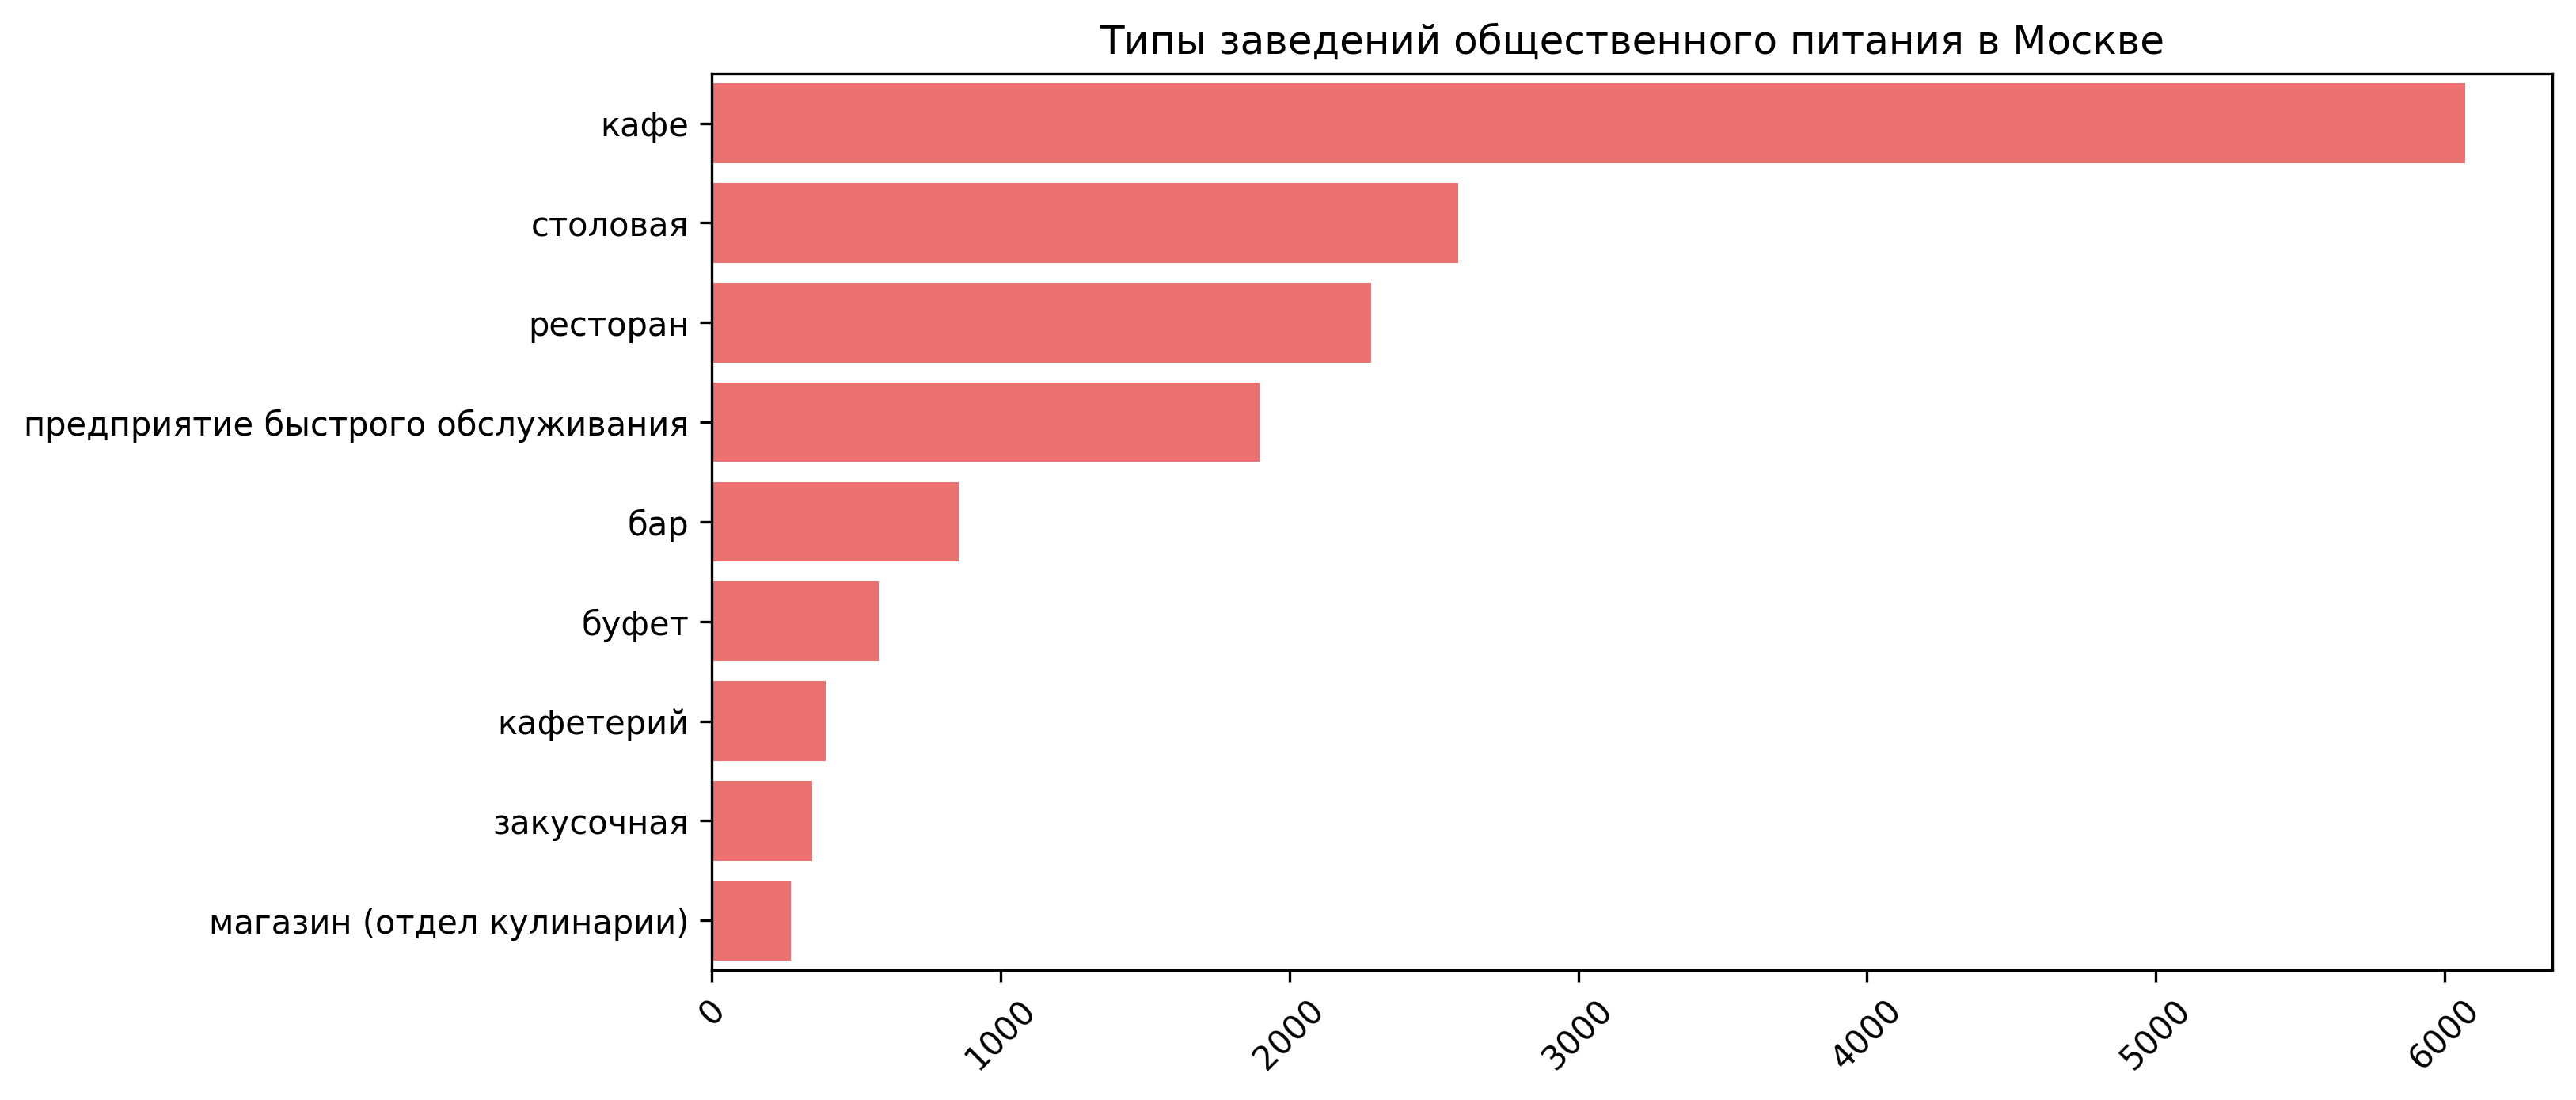

In [14]:
rest_data_type = rest_data.groupby('object_type', as_index = False).agg({'id': 'count'})
rest_data_type.sort_values(by='id', ascending=False, inplace=True)

fig, ax = plt.subplots(figsize=(10, 5), dpi=300)
ax = sns.barplot(x='id', y = 'object_type', data=rest_data_type, color='#ff5b5b')
ax = plt.title('Типы заведений общественного питания в Москве')
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("");
rest_data_type

Соглсно нашим данным, больше всего в Москве кафе - больше 6000, за ними по распространенности следуют столовые и рестораны.

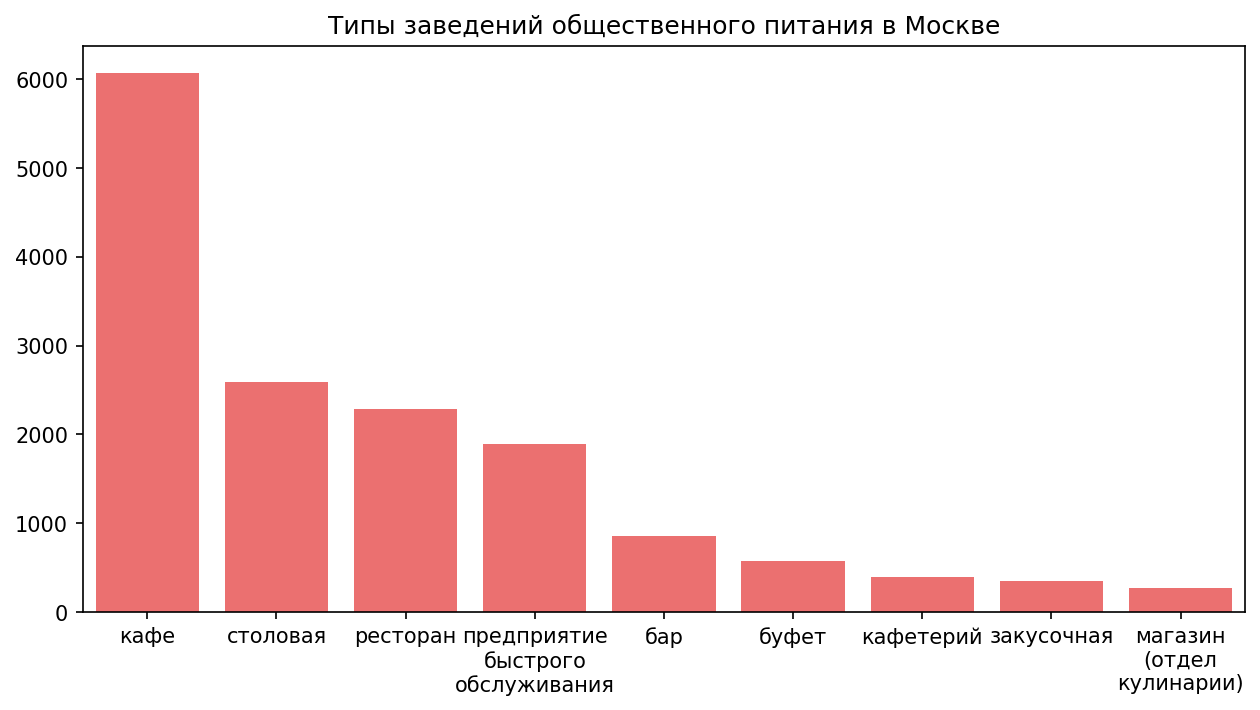

In [15]:
# код ревьюера

fig, ax = plt.subplots(figsize=(10, 5), dpi=150)
ax = sns.barplot(y='id', x = 'object_type', data=rest_data_type, color='#ff5b5b')
ax = plt.title('Типы заведений общественного питания в Москве')
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("")

old_ticks, old_labels = plt.xticks()
plt.xticks(old_ticks, ['\n'.join(label.get_text().split()) for label in old_labels], rotation=0);


### Сетевые заведения

Исследуем соотношение сетевых и несетевых заведений по количеству.

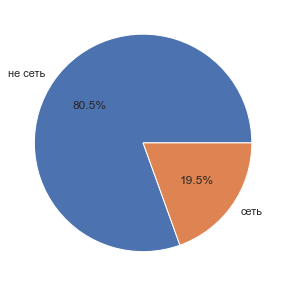

In [55]:
chain = rest_data.groupby('chain', as_index=False).count()

chain['сеть'] = 'не сеть', 'сеть'
chain.plot(kind='pie', y = 'id', labels = chain['сеть'], figsize=(5,5), autopct='%1.1f%%', legend=False)
plt.ylabel("")
plt.show() 


Всего около 19,5% заведений являются сетевыми.

Посмотрим, для какого вида объекта общественного питания характерно сетевое распространение?

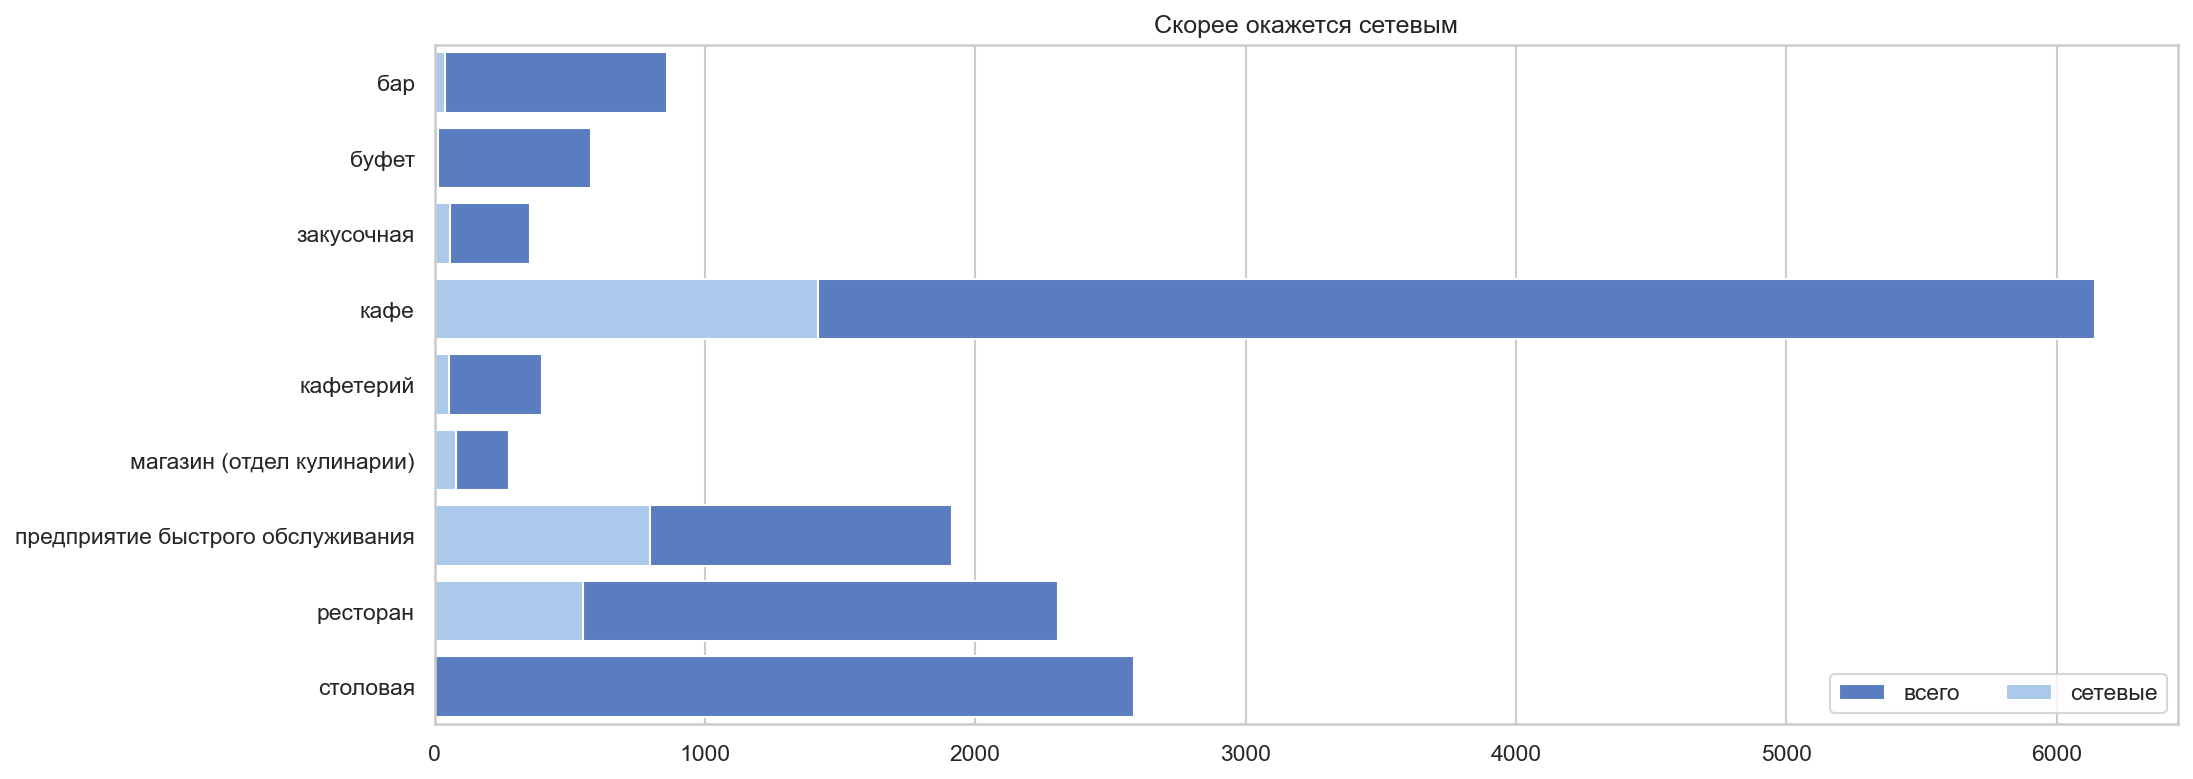

In [62]:
rest_data_all = rest_data.groupby('object_type', as_index = False).agg({'id': 'count'}).sort_values(by='object_type')
rest_data_chain = rest_data.query('chain == True').groupby('object_type', as_index = False).agg({'id': 'count'}).sort_values(by='object_type')

sns.set_theme(style="whitegrid")
# нарисуем matplotlib figure
fig, ax = plt.subplots(figsize=(15, 6), dpi=150)

# нарисуем общее количество заведений всех типов
sns.set_color_codes("muted")
sns.barplot(x="id", y="object_type", data=rest_data_all,
            label="всего", color="b")

# нарисуем поверх количество сетевых заведений каждого типа
sns.set_color_codes("pastel")
sns.barplot(x="id", y="object_type", data=rest_data_chain,
            label="сетевые", color="b")

# добавим легенду
ax.legend(ncol=2, loc="lower right", frameon=True)
plt.xlabel("")
plt.ylabel("")
plt.title('Скорее окажется сетевым');
####


Теперь посчитаем процент сетевых заведений для каждого типа.

In [18]:
rest_data_rate=rest_data_all.merge(rest_data_chain, on='object_type', suffixes=('_all', '_chain'))
rest_data_rate['rate'] = round(rest_data_rate['id_chain']/rest_data_rate['id_all']*100)
rest_data_rate.sort_values(by = 'rate', ascending=False)


,object_type,id_all,id_chain,rate
6,предприятие быстрого обслуживания,1897,788,42.0
5,магазин (отдел кулинарии),273,78,29.0
7,ресторан,2282,543,24.0
3,кафе,6071,1396,23.0
2,закусочная,348,56,16.0
4,кафетерий,395,52,13.0
0,бар,855,37,4.0
1,буфет,576,11,2.0
8,столовая,2584,3,0.0


Получается, больше всего вероятность стать сетью - у фастфуда и ресторана. Сети отделов кулинарии не стоит брать в рассчет - возможно это сети, которые идут в "комплекте" с крупными ретейлерами, типа `Spar`. У закусочной и кафе - тоже неплохие шансы.

### Количество столиков

Посмотрим на количество посадочных мест в сетевых заведениях. 

In [25]:
# сгруппируем сетевые заведения по количеству и числу столиков
tables = rest_data.query('chain == True').groupby('object_name', as_index=False).agg({ 'id': 'count', 'number': 'mean'})
tables = tables.query('id != 1') # исключим сети с 1 заведением
tables = tables.sort_values(by='id', ascending=False) #  отсортируем по убыванию количества заведений


Чтобы понять, какое количество столиков считать большим, средним и маленьким - построим диаграмму ящика с усами.

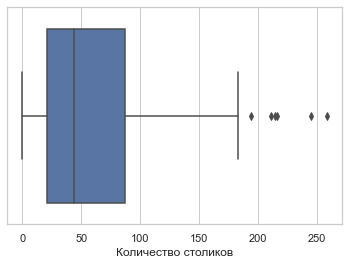

In [26]:
sns.boxplot(x = 'number', data=tables)
plt.xlabel('Количество столиков');


Исходя из графика поделим наши данные на 3 группы: от 0 до 20, от 20 до 80 и от 80 до 180, а все что выше - будем считать выбросом и удалим из датасета.

In [27]:
tables = tables.query('number <= 180')

In [28]:
tables_labels = ['мало', 'средне', 'много']
cut_bins = [0, 20, 80, 180]
tables['число столиков'] = pd.cut(tables['number'],
                              bins=cut_bins,
                              labels=tables_labels)
tables



,object_name,id,number,число столиков
325,макдоналдс,169,87.372781,много
554,шоколадница,157,57.184713,средне
25,kfc,155,55.341935,средне
108,бургер кинг,149,48.120805,средне
512,теремок,94,25.606383,средне
...,...,...,...,...
332,ми пьяче,2,45.000000,средне
212,кафе «крошка картошка»,2,18.500000,мало
207,кафе «данкин донатс»,2,27.500000,средне
417,предприятие быстрого обслуживания «теремок»,2,42.000000,средне


И такую же - чтобы посмотреть на размер сетей.

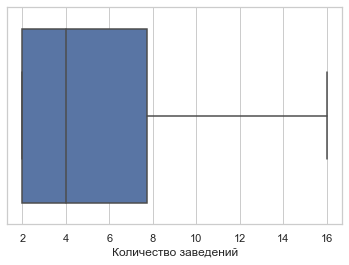

In [29]:
sns.boxplot(x = 'id', data=tables, showfliers=False)
plt.xlabel('Количество заведений');


Маленькая сеть - до 4 заведений, средняя - от 5 до 35, большая - до 80.

In [63]:
tables = tables.query('id <= 80')
tables_labels = ['маленькая', 'средняя', 'большая']
cut_bins = [0, 4, 35, 80]
tables['размер сети'] = pd.cut(tables['id'],
                              bins=cut_bins,
                              labels=tables_labels,
                              include_lowest=True)
tables



,object_name,id,number,число столиков,размер сети,group
496,суши wok,72,6.708333,мало,большая,мало столиков / большая заведений
334,милти,72,1.333333,мало,большая,мало столиков / большая заведений
45,starbucks,55,44.090909,средне,большая,средне столиков / большая заведений
362,папа джонс,51,22.039216,средне,большая,средне столиков / большая заведений
155,додо пицца,49,32.551020,средне,большая,средне столиков / большая заведений
...,...,...,...,...,...,...
332,ми пьяче,2,45.000000,средне,маленькая,средне столиков / маленькая заведений
212,кафе «крошка картошка»,2,18.500000,мало,маленькая,мало столиков / маленькая заведений
207,кафе «данкин донатс»,2,27.500000,средне,маленькая,средне столиков / маленькая заведений
417,предприятие быстрого обслуживания «теремок»,2,42.000000,средне,маленькая,средне столиков / маленькая заведений


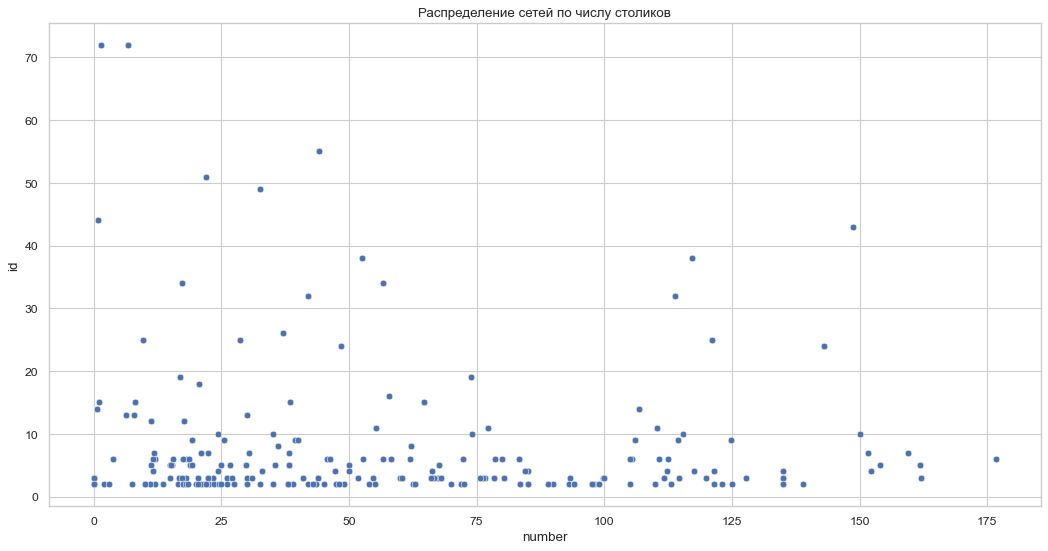

In [31]:

fig, ax = plt.subplots(figsize=(16,8), dpi=80)
sns.scatterplot(x = 'number', y = 'id', data = tables)
plt.title('Распределение сетей по числу столиков');

Большинство сетей средние и маленькие (до 10 заведений) со средним количеством столиков (от 25 до 50).


Посмотрим распределение количества посадочных мест по разным типам заведений.

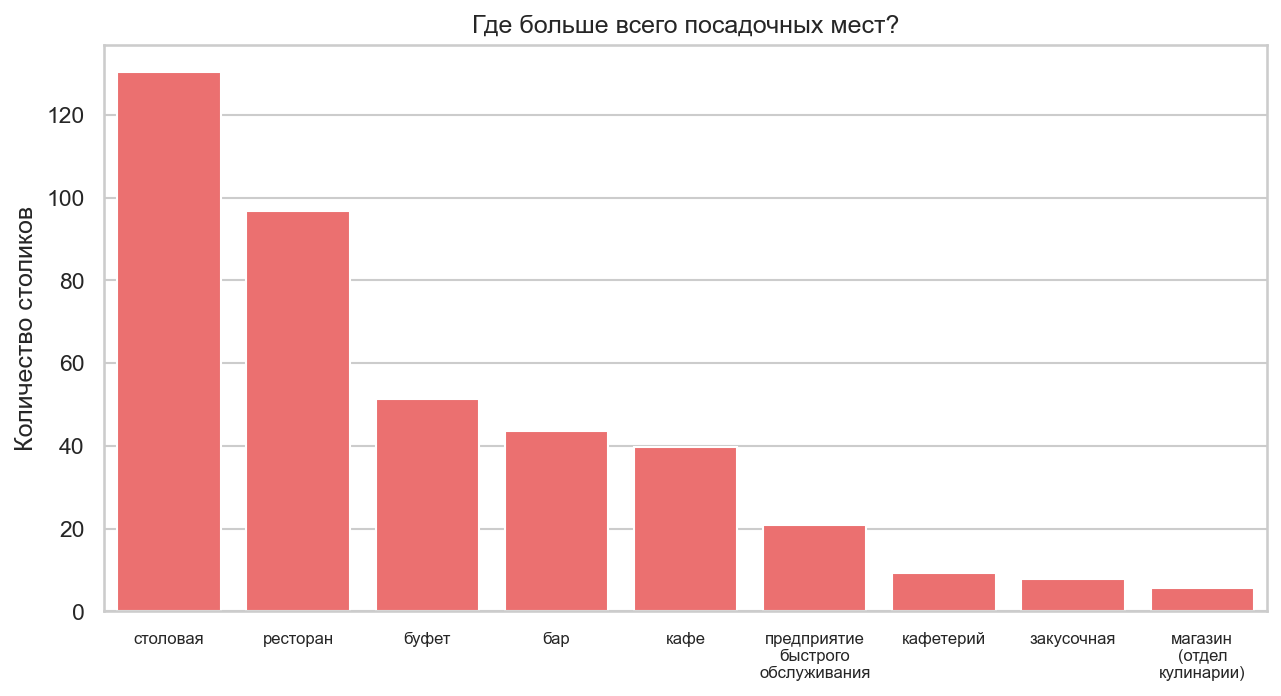

In [35]:
data = rest_data.groupby('object_type', as_index=False).agg({ 'number': 'mean'}).sort_values(by = 'number', ascending = False)
fig, ax = plt.subplots(figsize=(10, 5), dpi=150)
ax = sns.barplot(x = 'object_type', y = 'number', data = data, color = '#ff5b5b')
ax = plt.title('Где больше всего посадочных мест?')
plt.xticks(rotation=70)
plt.xlabel("")
plt.ylabel("Количество столиков")

old_ticks, old_labels = plt.xticks()
plt.xticks(old_ticks, ['\n'.join(label.get_text().split()) for label in old_labels], rotation=0, fontsize=8);


Мы видим, что у абсолютного большинства заведений посадка составляет не более 150 столиков. Так же можно сказать, что большинство заведений имеют небольшое количество столиков, но есть так же и немного сетевых заведений, в которых столиков очень много.

Выше мы определили для себя формат заведения как кафе или предприятие быстрого обслуживания. А в таких заведениях в среднем от 20 до 40 столиков

In [37]:
data = rest_data.query('object_type in ("предприятие быстрого обслуживания","кафе")').groupby('object_type', as_index=False).agg({ 'number': 'mean'}).sort_values(by = 'number', ascending = False)
data.columns=('тип предприятия', 'число столиков')
data['число столиков'] = round(data['число столиков'])
data

,тип предприятия,число столиков
0,кафе,40.0
1,предприятие быстрого обслуживания,21.0


Больше всего посадочных мест - в столовых и ресторанах, а меньше всего, логично, в отделах кулинарии в магазинах, как правило, там 1-2 столика.

### Выбираем районы для заведения 

Узнаем, на каких улицах Москвы больше всего заведений.

In [38]:

rest_data['street'] = rest_data['address'].str.split(", ") # поделим по запятой

rest_data['street'] = rest_data['street'].apply(lambda x: x[1]) # возьмем вторую подстроку
rest_data

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,True,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15276,208537,шоколадница,True,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15277,209264,шоколадница,True,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15278,209186,шоколадница,True,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15279,221900,шоколадница,True,кафе,"город Москва, поселение Московский, Киевское ш...",36,поселение Московский


In [40]:

street_types = ['улица','проспект','бульвар']

def extract_street(address):
    for address_part in address.split(', '):
        for s_type in street_types:
            if s_type in address_part:
                return address_part.strip()


rest_data['street'] = rest_data['address'].apply(extract_street)
rest_data.head(10)

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,True,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
5,27429,стол. при гоу сош № 1051,False,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240,Абрамцевская улица
6,148815,брусника,True,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,None
7,20957,буфет мтуси,False,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90,Авиамоторная улица
8,20958,кпф семья-1,False,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150,Авиамоторная улица
9,28858,столовая мтуси,False,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120,Авиамоторная улица


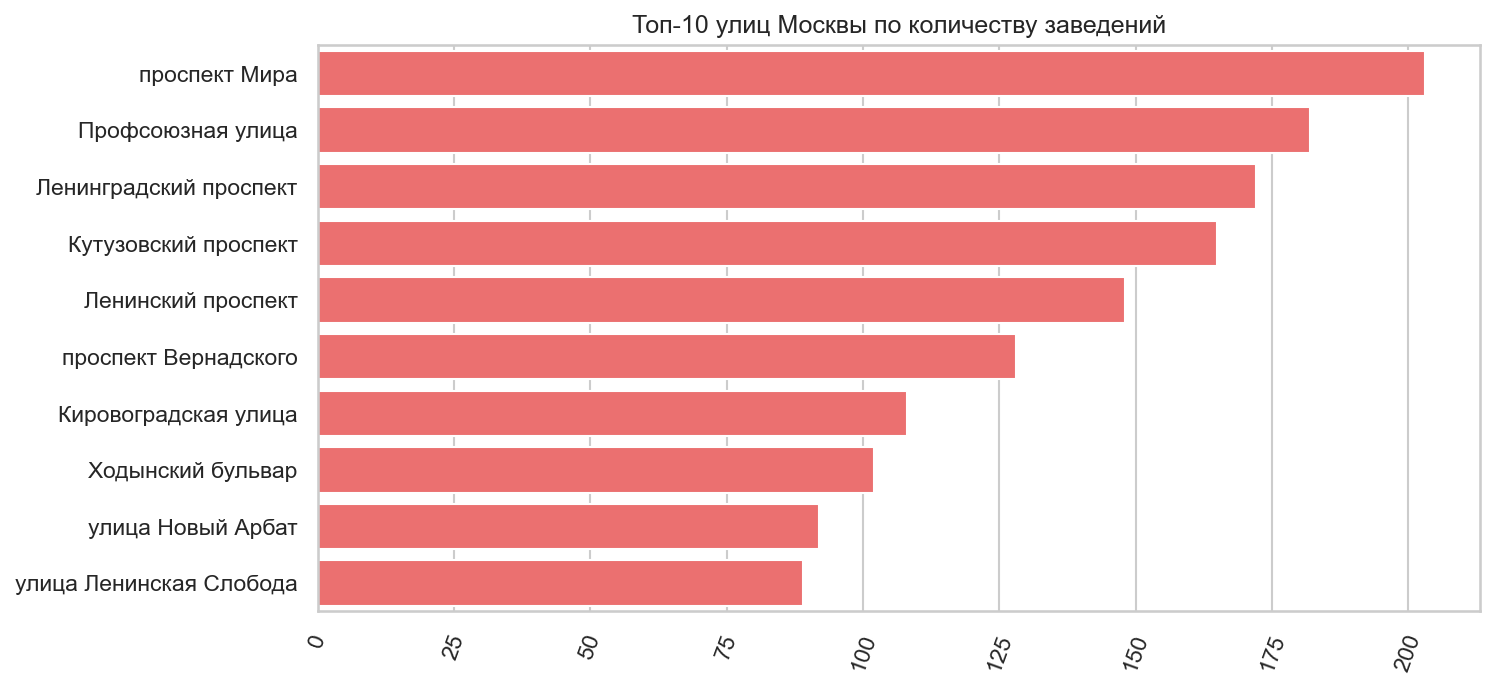

In [69]:
# сгруппируем по названию улиц, выполним сортировку, выберем топ 10 улиц с наибольшим числом заведений
street = rest_data.groupby('street', as_index=False).agg({ 'id': 'count'}).sort_values(by = 'id', ascending=False)

fig, ax = plt.subplots(figsize = (10, 5), dpi=150)
ax = sns.barplot(x = 'id', y = 'street', data = street.head(10), color = '#ff5b5b')
plt.title('Топ-10 улиц Москвы по количеству заведений')
plt.xticks(rotation = 70)
plt.xlabel("")
plt.ylabel("")
plt.savefig('Топ-10 улиц Москвы по количеству заведений.png');


In [42]:

street.head(10)

list_of_streets = street['street'].head(10).values.tolist()
street.reset_index(drop=True).head(10)


,street,id
0,проспект Мира,203
1,Профсоюзная улица,182
2,Ленинградский проспект,172
3,Ленинский проспект,148
4,проспект Вернадского,128
5,Кутузовский проспект,114
6,Кировоградская улица,108
7,Ходынский бульвар,102
8,улица Новый Арбат,92
9,улица Ленинская Слобода,89


В наших данных не хватает названий районов, для того, чтобы добавить их, воспользуемся датасетом из [открытого портала правительства Москвы](https://data.mos.ru/opendata/7710881420-obshchestvennoe-pitanie-v-moskve/data/table?versionNumber=1&releaseNumber=95)

In [43]:
from io import BytesIO
import requests
spreadsheet_id = '1_5su13qQPL_A4YkrILs32AjxXu3Xl2gIj4ITcizUj3Q'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))
df

,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84,geodata_center,geoarea
0,Код,Наименование,global_id,Является сетевым,Название управляющей компании,Вид объекта,Административный округ по адресу,Район,Адрес,Контактный телефон,Число посадочных мест,Показатель социальных льгот,Долгота в WGS-84,Широта в WGS-84,geodata_center,geoarea
1,00151635,СМЕТАНА,637376221,нет,NaN,кафе,Северо-Восточный административный округ,Ярославский район,"город Москва, улица Егора Абакумова, дом 9",PublicPhone:(499) 183-14-10\n\n,48,нет,37.7145650004360390,55.8790015313033730,NaN,NaN
2,000077874,Родник,637376331,нет,NaN,кафе,Центральный административный округ,Таганский район,"город Москва, улица Талалихина, дом 2/1, корпус 1",PublicPhone:(495) 676-55-35\n\n,35,нет,37.6733061300344000,55.7382386551547000,NaN,NaN
3,000024309,Кафе «Академия»,637376349,нет,NaN,ресторан,Центральный административный округ,Таганский район,"Российская Федерация, город Москва, внутригоро...",PublicPhone:(495) 662-30-10\n\n,95,нет,37.6696475969381000,55.7355114718314000,NaN,NaN
4,000027429,ГБОУ «Школа № 1430 имени Героя Социалистическо...,637376480,нет,NaN,столовая,Северо-Восточный административный округ,район Лианозово,"город Москва, Угличская улица, дом 17",PublicPhone:(499) 908-06-15\n\n,240,нет,37.5669400000000020,55.9040188006692200,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19552,00363535,Домино'с Пицца,2381690180,да,Домино'с Пицца,кафе,Юго-Западный административный округ,район Тёплый Стан,"Российская Федерация, город Москва, внутригоро...",NaN,17,нет,37.5111530000000070,55.6363787228666450,"{""coordinates"":[37.511153,55.6363787228666],""t...",NaN
19553,00363333,Coffeeshop Company,2381690187,да,Coffeeshop Company,кафе,Центральный административный округ,Красносельский район,"город Москва, Мясницкая улица, дом 11",NaN,42,нет,37.6326579999999990,55.7617077590700060,"{""coordinates"":[37.632658,55.76170775907],""typ...",NaN
19554,00363641,Хлебница пекарня,2381690199,да,Хлебница пекарня,кафетерий,Юго-Западный административный округ,район Тёплый Стан,"Российская Федерация, город Москва, внутригоро...",NaN,6,нет,37.5151020000000060,55.6303137211249140,"{""coordinates"":[37.515102,55.6303137211249],""t...",NaN
19555,00363805,Милти,2381690282,да,Милти,предприятие быстрого обслуживания,Северо-Восточный административный округ,район Марьина Роща,"Российская Федерация, город Москва, внутригоро...",NaN,1,нет,37.6025440000000230,55.7922847679640980,"{""coordinates"":[37.602544,55.7922847679641],""t...",NaN


Присоединим названия районов, объединив датасеты по адресу.

In [44]:
rest_data = rest_data.merge(df[['District', 'Address']], right_on = 'Address', left_on = 'address', how = 'left')
rest_data



,id,object_name,chain,object_type,address,number,street,District,Address
0,151635,сметана,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,Ярославский район,"город Москва, улица Егора Абакумова, дом 9"
1,77874,родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,Таганский район,"город Москва, улица Талалихина, дом 2/1, корпус 1"
2,24309,кафе «академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица,NaN,NaN
3,21894,пиццетория,True,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица,район Лианозово,"город Москва, Абрамцевская улица, дом 1"
4,21894,пиццетория,True,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица,район Лианозово,"город Москва, Абрамцевская улица, дом 1"
...,...,...,...,...,...,...,...,...,...
69209,222535,шоколадница,True,кафе,"город Москва, Ходынский бульвар, дом 4",10,Ходынский бульвар,Хорошёвский район,"город Москва, Ходынский бульвар, дом 4"
69210,222535,шоколадница,True,кафе,"город Москва, Ходынский бульвар, дом 4",10,Ходынский бульвар,Хорошёвский район,"город Москва, Ходынский бульвар, дом 4"
69211,222535,шоколадница,True,кафе,"город Москва, Ходынский бульвар, дом 4",10,Ходынский бульвар,Хорошёвский район,"город Москва, Ходынский бульвар, дом 4"
69212,222535,шоколадница,True,кафе,"город Москва, Ходынский бульвар, дом 4",10,Ходынский бульвар,Хорошёвский район,"город Москва, Ходынский бульвар, дом 4"


In [45]:
rest_data.duplicated(subset=rest_data.columns.difference(['id'])).sum() # посчитаем количество дубликатов


53804

In [46]:
# удалим дубликаты, сделаем перезагрузку индексов
rest_data = rest_data.drop_duplicates(subset=rest_data.columns.difference(['id'])).reset_index(drop=True)
rest_data.duplicated(subset=rest_data.columns.difference(['id'])).sum()

0

Теперь добавим названия районов к нашему топу улиц.


In [47]:
pd.set_option('display.max_rows', None)
street = rest_data.loc[rest_data['street'].isin(list_of_streets)] # отфильтруем по топу улиц

street.groupby(['street', 'District']).agg({'id':'count'}) # сгруппируем по улице и району

id
street                  District                       
Кировоградская улица    район Чертаново Северное     19
                        район Чертаново Центральное  76
                        район Чертаново Южное         7
Кутузовский проспект    поселение Краснопахорское    40
                        район Дорогомилово           39
                        район Фили-Давыдково         63
Ленинградский проспект  Хорошёвский район            12
                        район Аэропорт               61
                        район Беговой                46
                        район Сокол                  20
Ленинский проспект      Гагаринский район            31
                        Донской район                10
                        Ломоносовский район          10
                        Обручевский район            30
                        район Проспект Вернадского    1
                        район Тропарёво-Никулино     20
                        район Тёплый Стан             3
                        район Якиманка               12
Профсоюзная улица       Обручевский район            30
                        район Коньково               30
                        район Тёплый Стан            36
                        район Черёмушки              34
                        район Ясенево                14
Ходынский бульвар       Хорошёвский район            99
проспект Вернадского    Ломоносовский район          13
                        поселение Вороновское         1
                        район Проспект Вернадского   11
                        район Раменки                32
                        район Тропарёво-Никулино     46
проспект Мира           Алексеевский район           42
                        Мещанский район              53
                        Останкинский район           12
                        район Ростокино               6
                        район Свиблово               62
улица Ленинская Слобода Даниловский район            80
улица Новый Арбат       район Арбат                  87

Ничего удивительного - в список самых густо-населенных заведениями улиц пропали проспекты. 
1. Проспект мира (8.9 км)- хоть и не самая длинная улица Москвы, но проходит через самый центр города, захватывает несколько станций метро, и при этом не имеет такого оживленного трафика как другие проспекты Москвы - не удивительно, что больше всего заведений находится вдоль него. 

0. Профсоюзная улица (9.3 км) начинается возле метро Академическая, элитного района Москвы, и тянется аж до МКАДа. Идет на Юго-Запад.

0. Ленинградский проспект относительно недлинный (5.6 км), по отношению к другим улицам нашего списка, тянется от Белорусского вокзала до метро Сокол - на Северо-Запад.

0. Пресненская набережная попала в наш топ из-за того, что на ней стоит деловое сердце города - Москва-Сити.

0. Варшавское шоссе - самая длинная улица Москвы (22.5 км). Идет на Юг.

0. Ленинский проспект(16 км). Юго_Запад.
0. Кировоградская улица - в крупном южном районе Москвы Чертаново


В целом, большая часть топовых улиц Москвы является крупными атрериями города, они тянутся примерно от 3 Транспортного Кольца в разные стороны города. БОльшая их чатсь находится на Юге и Юго-Западе, где располагаются наиболее густо-населенные и этиные районы Москвы.

Но Восточная часть Москвы не так богата заведениями, хотя и людей там живет меньше. 

 <img width="320" src=https://i.imgur.com/6XLc0Xy.png><br>
[Карта улиц](https://yandex.ru/maps/?um=constructor%3A38504dd94881c7523193c97467c1b6789ad4e454646b617937f364bfa07d7ccf&source=constructorLink)


In [48]:
# сгруппируем по улице и району


rest_data.groupby(['District', 'street']).agg({'id':'count'}).sort_values(by='id', ascending=False)


,,id
District,street,
Хорошёвский район,Ходынский бульвар,99
район Арбат,улица Новый Арбат,87
Даниловский район,улица Ленинская Слобода,80
район Чертаново Центральное,Кировоградская улица,76
Басманный район,улица Покровка,70
район Замоскворечье,Пятницкая улица,64
район Фили-Давыдково,Кутузовский проспект,63
район Марьина Роща,улица Сущёвский Вал,62
район Свиблово,проспект Мира,62


Так мы получили самые "плотные" куски всех улиц - те, на которых больше всего заведений, но есть вероятность, что там просто расположен большой ТЦ.

In [49]:
pd.set_option('display.max_rows', 10)

Посмотрим, а на каких улицах Москвы только 1 заведение и в каких районах города находятся такие заведения.  


In [50]:
street_1 = rest_data.groupby(['District', 'street'], as_index=False).agg({ 'id': 'count'}) # выполним группировку по району и улице
street_1 = street_1.query('id == 1') # отфильтруем по количеству заведений на улице

street_1

,District,street,id
2,Академический район,улица Гримау,1
3,Академический район,улица Дмитрия Ульянова,1
4,Академический район,улица Кедрова,1
6,Академический район,улица Шверника,1
10,Алексеевский район,Староалексеевская улица,1
...,...,...,...
1264,район Южное Медведково,Сухонская улица,1
1268,район Южное Тушино,Туристская улица,1
1270,район Южное Тушино,Штурвальная улица,1
1292,район Ясенево,Тарусская улица,1


В нашем датасете нашлось 579 таких улиц. Посмотрим, в каких районах больше всего таких улиц? Выведем топ-10.

In [51]:
district = street_1.groupby('District').agg({'id' : 'count'}).sort_values(by = 'id', ascending=False).reset_index().head(10)
district.columns=('район', 'число заведений')
district

,район,число заведений
0,Таганский район,12
1,Можайский район,10
2,район Сокольники,9
3,Басманный район,8
4,район Южное Бутово,8
5,район Соколиная Гора,7
6,Рязанский район,7
7,район Внуково,7
8,район Щукино,7
9,Даниловский район,6


Больше всего улиц только с 1 заведением находится в центре Москвы. Возможно виной тому маленькие улочки старого центра - на них не помещается слишком много заведений. Но в центре Москвы высокая арендная ставка и высокая конкуренция - даже если на улице всего 1 заведение, на соседней будет еще 5.

[Содержание](#0)

<a id=4> </a>
## Вывод

Проанализировав открытые данные мы узнали, в каких районах Москвы и на каких улицах больше всего заведений, а где их не так много. С одной стороны, это говорит о том, что они не так востребованы, но с другой - о низкой конкуренции.

Что касается типа заведения - если мы хотим сеть - кафе или фастфуд-заведение будут наиболее выгодным вариантом. Можно не тратить слишком много на интерьер (как если бы мы открывали ресторан), но вложиться в оборудовние кухни, продукты, а роботизация персонала позволит сэкономить на зарплате.

Мы выявили улицы с самым большим числом заведений, а так же улицы, на которых всего по одной точке, но вторые данные мало о чем нам говорят, не очень понятно, как можно воспользоваться данной информацией. Было бы здорово собрать данные о количестве заведений, например, на 1км2.
Мы планируем открыть сеть кафе. Предположим у нас есть бюджет на 3 первых точки. Но мы все еще не знаем, выстрелит ли идея. Можно открыть 1 тестовое заведение в пределах TTK. Выберем Юг Москвы, как более престижный и густонаселенный (а значит, у людей там есть деньги): Хамовники или Якиманку. Разумеется для выбора более точной локации нужно провести анализ трафика и инфраструктуры, а так же изучить стоимость аренды в данных районах.  
Если идея понравится жителям Москвы - можно подумать о заведениях в других районах или большом ресторане на 70-80 столиков. Опять же роботизация должна позволить повысить скорость обслуживания, а значит за день мы сможем обслужить больше гостей.

Так же было бы целесообразно посмотреть на арендную ставку в избранных районах. И исходя из нашего бюджета принимать решение.



[Презентация](https://drive.google.com/file/d/1aD0EnsPLnM76hGD4JausiyyNBJejzzIl/view?usp=sharing)
